In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

from BZI.sampling import make_cell_points
from BZI.plots import plot_mesh, plot_band_structure
from BZI.symmetry import make_ptvecs, make_rptvecs, reduce_kpoint_list
from BZI.pseudopots import *
from BZI.integration import rectangular_fermi_level, rectangular_method

from opf_python.jeremy import spGrids

### Al tests

<IPython.core.display.Javascript object>


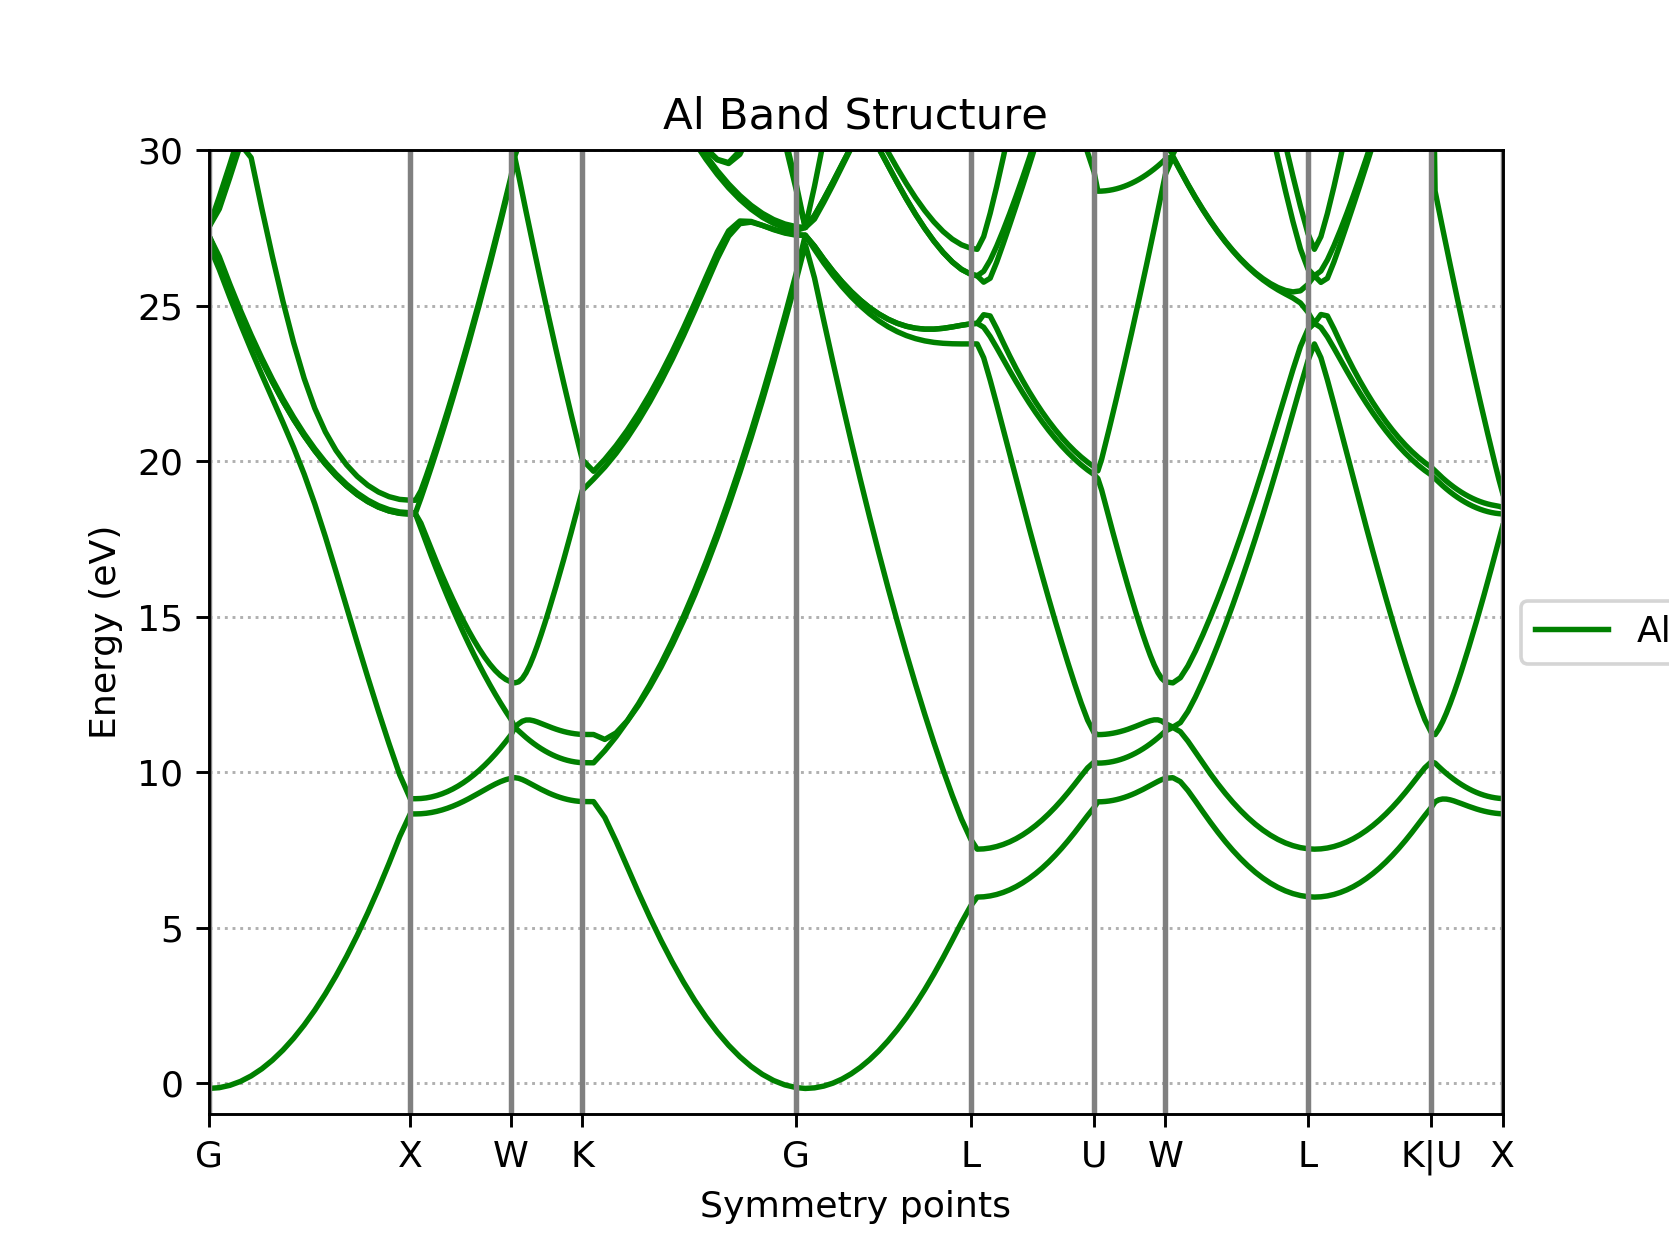

In [4]:
Al_energy_shift = 0
Al_params = {"materials_list": ["Al"],
             "PPlist": [Al_PP],
             "PPargs_list": [{}],
             "lattice": Al_lattice,
             "npts": 20,
             "neigvals": 10,
             "energy_shift": Al_energy_shift,
             "energy_limits": [-1,30],
             "show": True,
             "save": True}
plot_band_structure(**Al_params)

sc: $n^3, 2n^3, 4n^3$

bcc: $n^3, 2n^3, 4n^3$

fcc: $n^3, 4n^3, 16n^3$

In [38]:
# Generate the "solution".
t = time.time()
rgrid_angles = [np.pi/2]*3
rgrid_consts = np.array(Al_PP.lattice.constants)*100
rgrid_centering = "face"

rgrid_vecs = make_ptvecs(rgrid_centering, rgrid_consts, rgrid_angles)
grid_vecs = make_rptvecs(rgrid_vecs)

shift = [0.]*3
grid = make_cell_points(Al_PP.lattice.reciprocal_vectors, grid_vecs, shift)
reduced_grid, weights = reduce_kpoint_list(grid, Al_PP.lattice.reciprocal_vectors, grid_vecs, shift)

Al_PP.fermi_level = rectangular_fermi_level(Al_PP, reduced_grid, weights)
total_energy_ans = rectangular_method(Al_PP, reduced_grid, weights)
times.append(time.time()-t)

In [5]:
Al_total_energy_ans = 22.220774033067471
Al_fermi_level_ans = 11.560507533758084

In [11]:
tot_kpts = np.array(range(2,47))**3
tot_kpts = np.append(tot_kpts, np.append([4*tot_kpts], [16*tot_kpts]))
tot_kpts = np.sort(tot_kpts)
tot_kpts = list(filter(lambda x: x <= 100000, tot_kpts))

pfrac_list = []
r_min_list = []
nirr_kpts_list = []
te_error_list = []
fl_error_list = []
fl_list = []
te_list = []
for kpts in tot_kpts:
    print(kpts)
    for grid_dict in spGrids(Al_PP.lattice.vectors, kpts):
        shift = [0.]*3
        grid_vecs = 2*np.pi*grid_dict["grid_vecs"]
        pfrac_list.append(grid_dict["packing_frac"])
        r_min_list.append(grid_dict["r_min"])
                
        grid = make_cell_points(Al_PP.lattice.reciprocal_vectors, grid_vecs, shift)
        reduced_grid, weights = reduce_kpoint_list(grid, Al_PP.lattice.reciprocal_vectors, grid_vecs, shift)
        nirr_kpts_list.append(len(weights))
        Al_PP.fermi_level = rectangular_fermi_level(Al_PP, reduced_grid, weights)
        fl_list.append(Al_PP.fermi_level)
        total_energy = rectangular_method(Al_PP, reduced_grid, weights)
        te_list.append(total_energy)
        te_error_list.append(abs(Al_total_energy_ans - total_energy))
        fl_error_list.append(abs(Al_fermi_level_ans - Al_PP.fermi_level))

8
27
32
64
108
125
128
216
256
343
432
500
512
729
864
1000
1024
1331
1372
1728
2000
2048
2197
2744
2916
3375
3456
4000
4096
4913
5324
5488
5832
6859
6912
8000
8192
8788
9261
10648
10976
11664
12167
13500
13824
15625
16000
16384
17576
19652
19683
21296
21952
23328
24389
27000
27436
27648
29791
32000
32768
35152
35937
37044
39304
42592
42875
43904
46656
48668
50653
54000
54872
55296
59319
62500
64000
65536
68921
70304
74088
78608
78732
79507
85184
87808
91125
93312
97336
97556


<IPython.core.display.Javascript object>


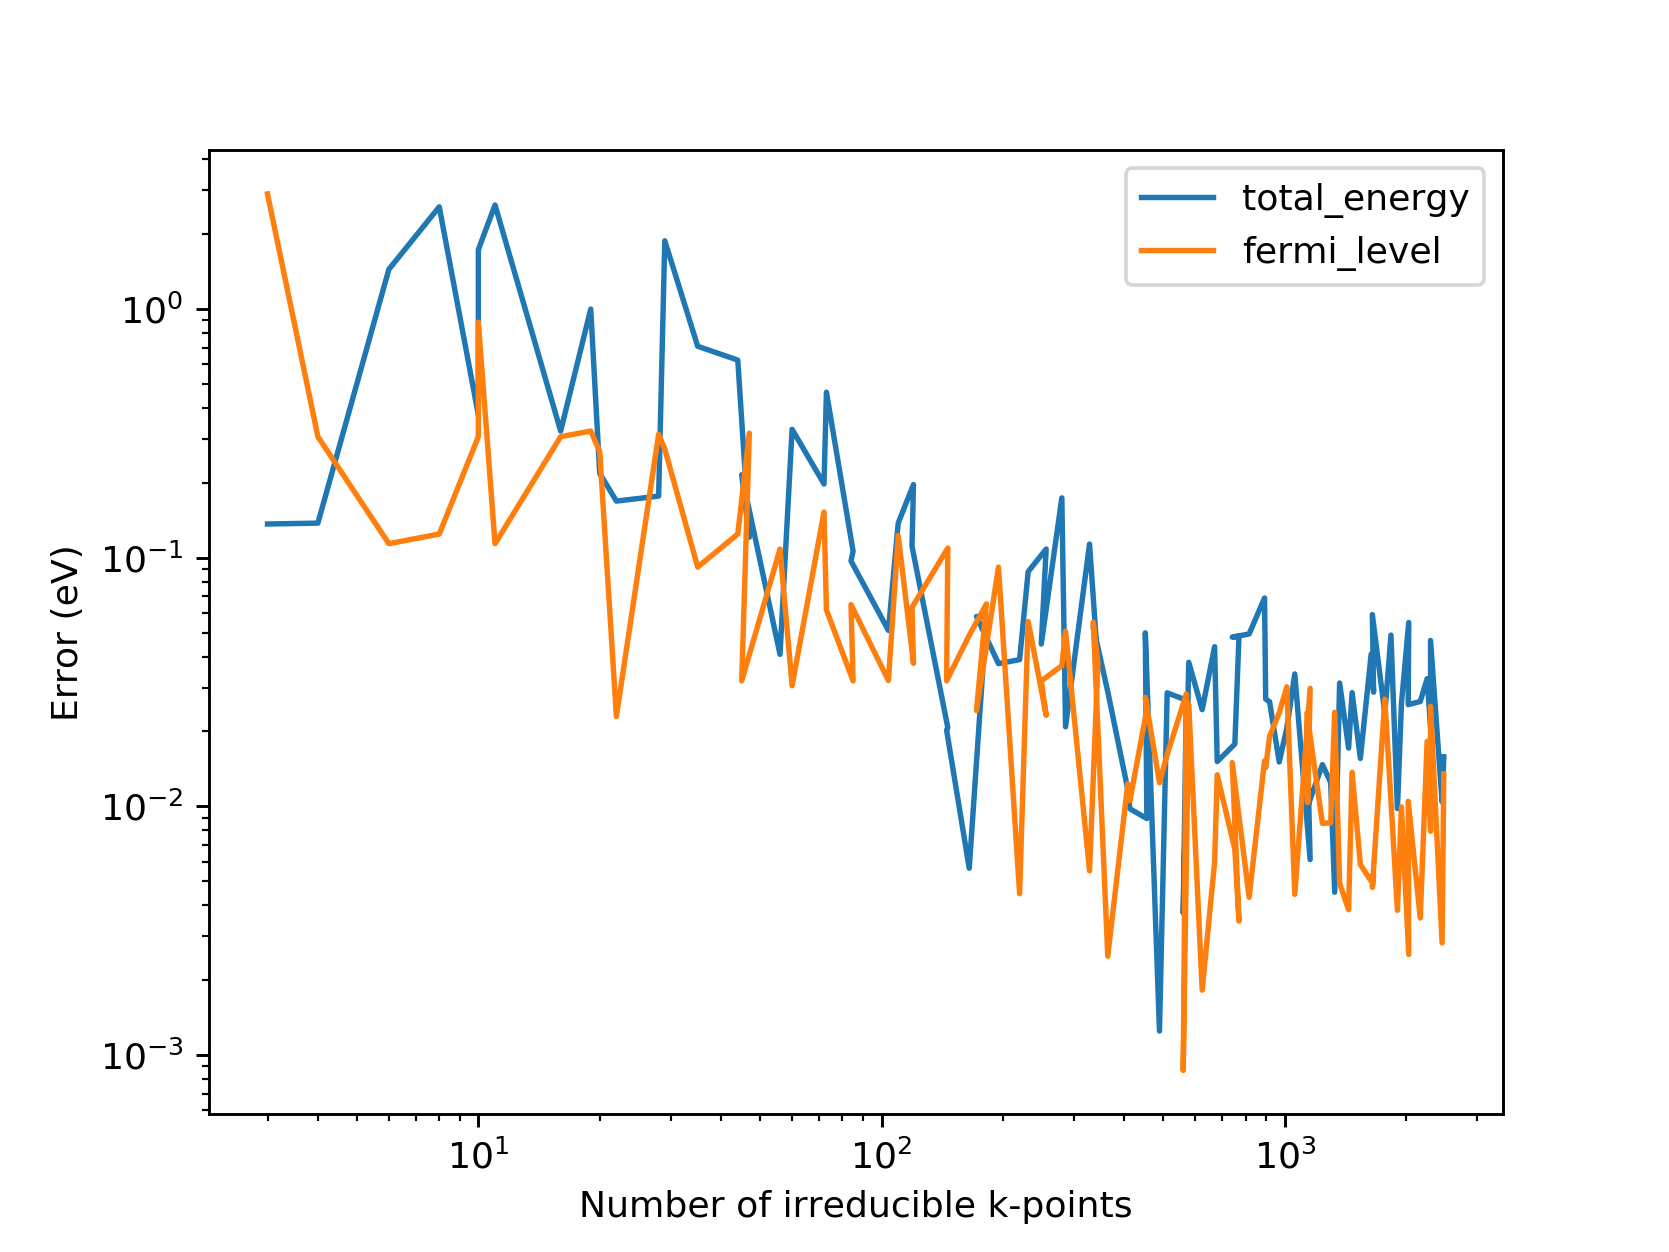

In [12]:
plt.loglog(nirr_kpts_list, te_error_list, label="total_energy")
plt.loglog(nirr_kpts_list, fl_error_list, label="fermi_level")
plt.xlabel("Number of irreducible k-points")
plt.ylabel("Error (eV)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


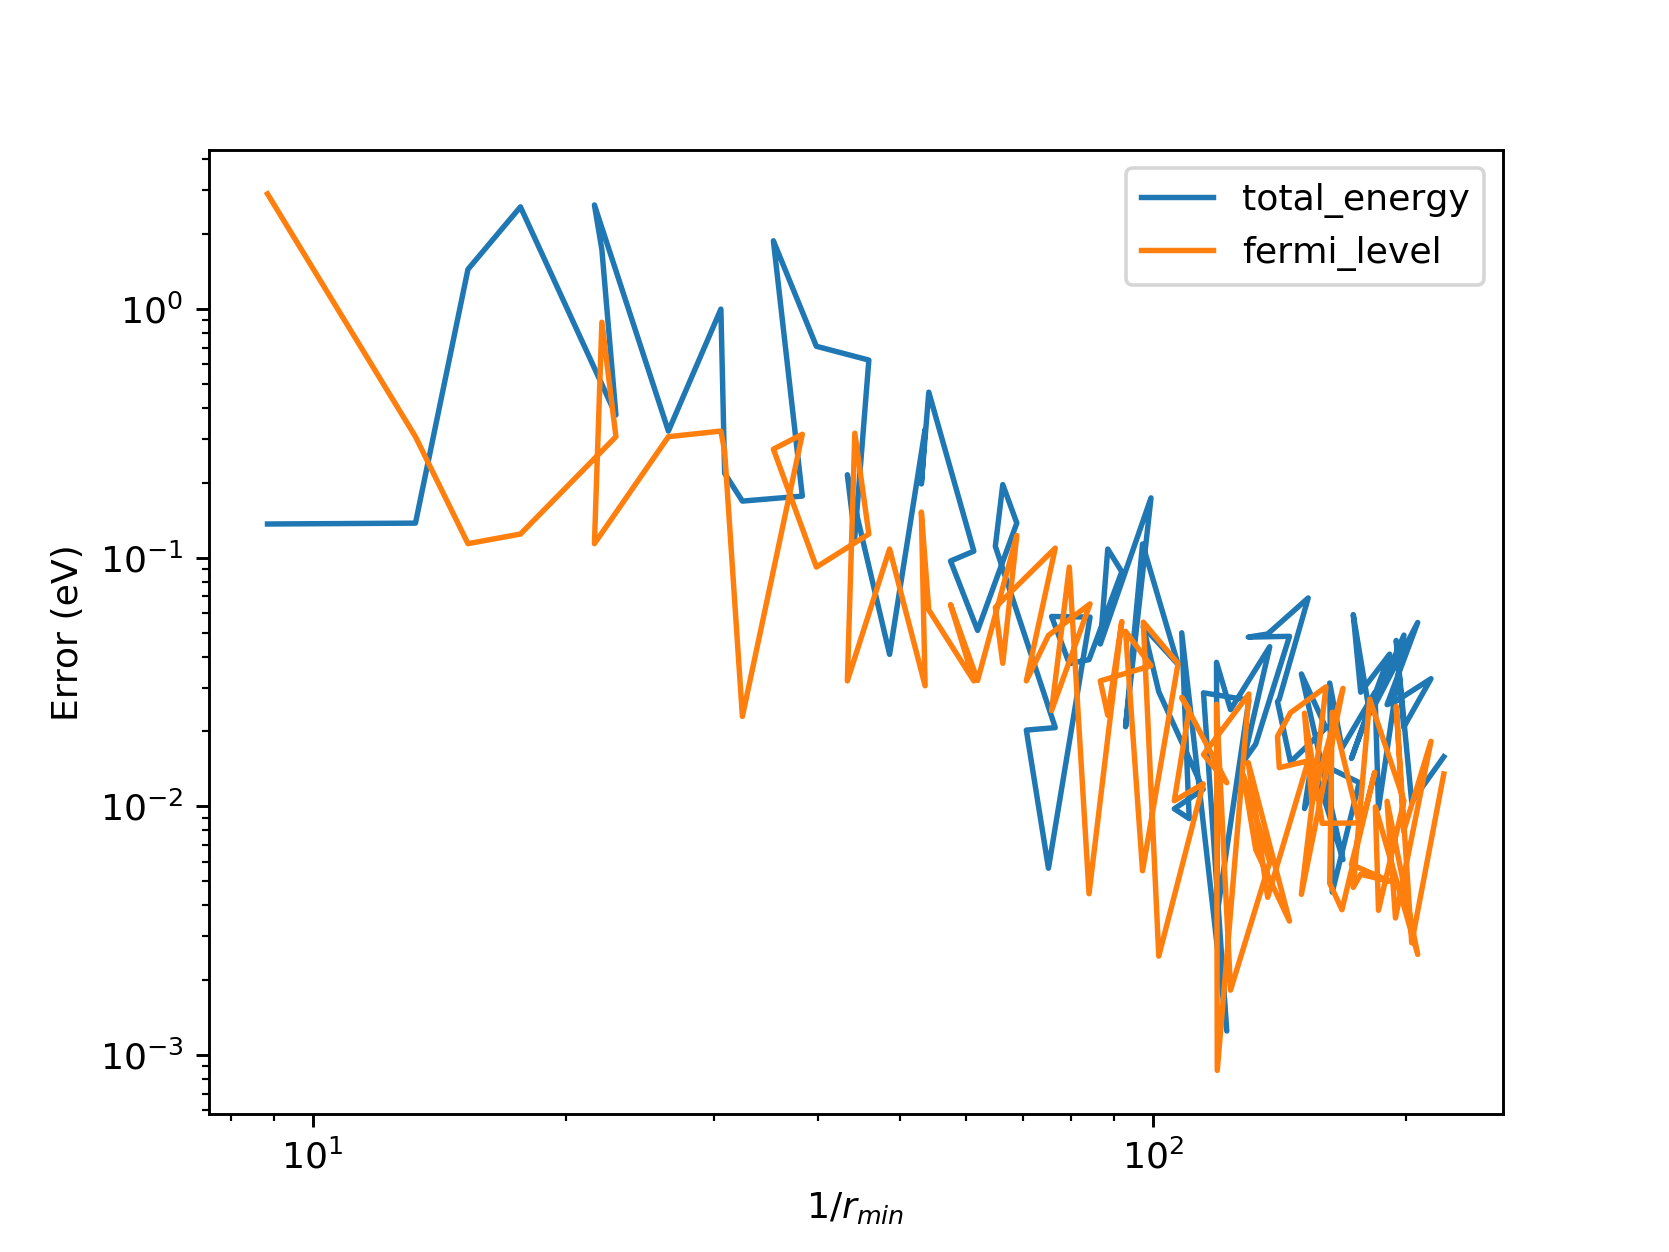

In [21]:
plt.loglog(1/np.array(r_min_list), te_error_list, label="total_energy")
plt.loglog(1/np.array(r_min_list), fl_error_list, label="fermi_level")
plt.xlabel("$1/r_{min}$")
plt.ylabel("Error (eV)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


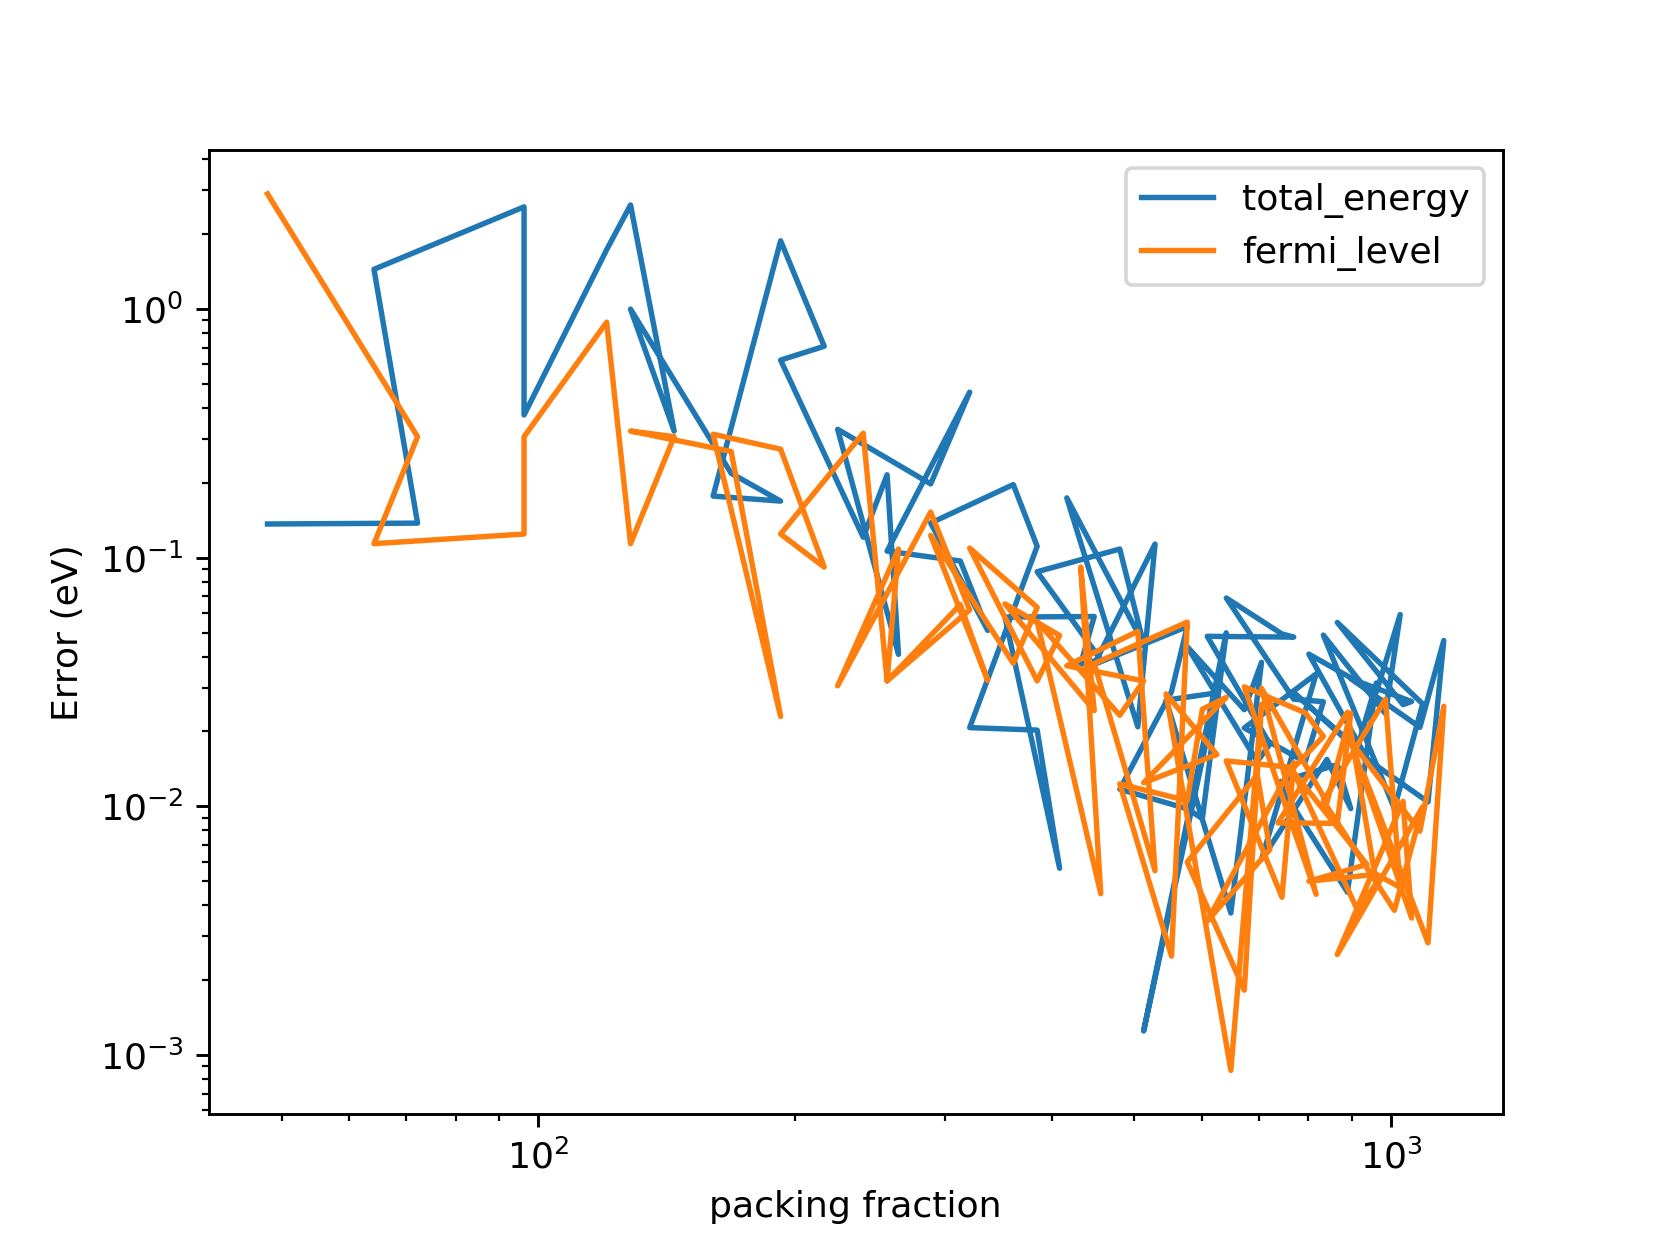

In [22]:
plt.loglog(pfrac_list, te_error_list, label="total_energy")
plt.loglog(pfrac_list, fl_error_list, label="fermi_level")
plt.xlabel("packing fraction")
plt.ylabel("Error (eV)")
plt.legend()
plt.show()

In [35]:
Mg_PP.lattice.type

'hexagonal'

### Zn tests

<IPython.core.display.Javascript object>


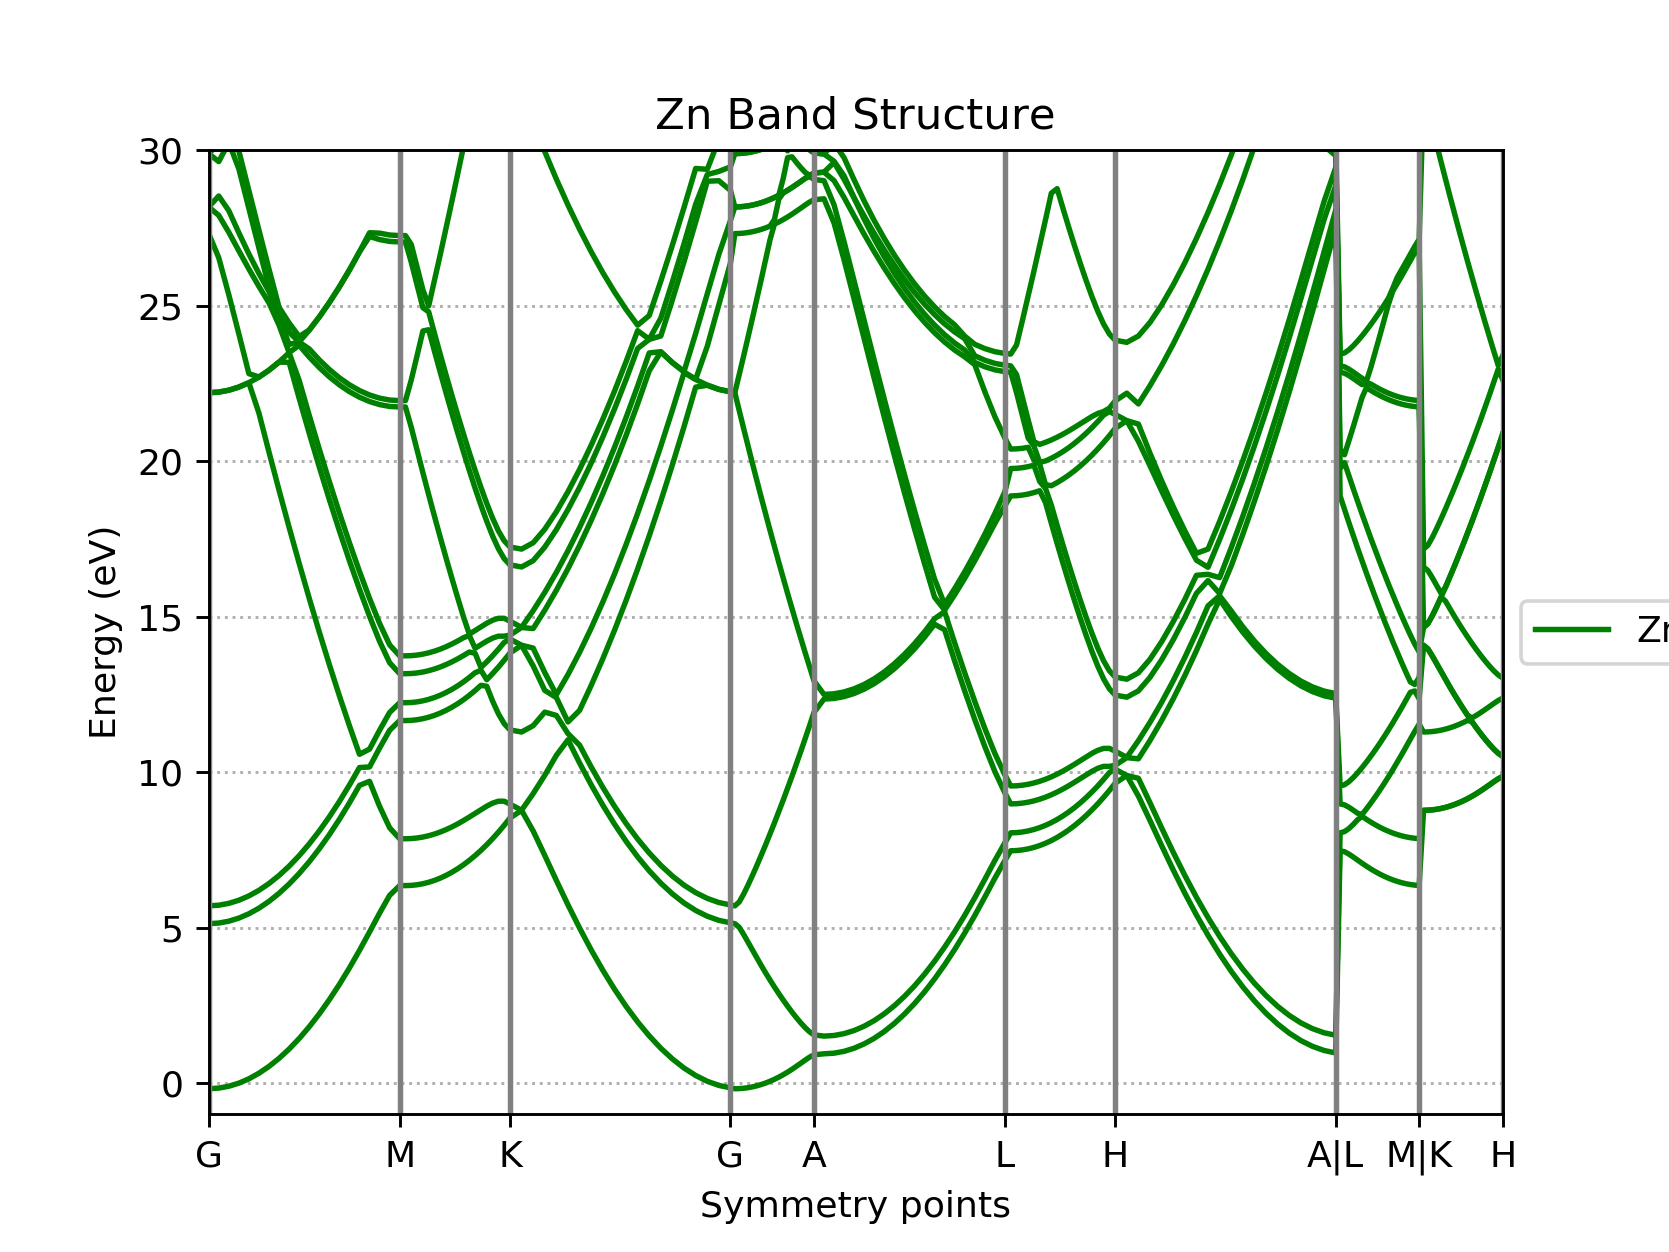

In [50]:
Zn_energy_shift = 0
Zn_params = {"materials_list": ["Zn"],
             "PPlist": [Zn_PP],
             "PPargs_list": [{}],
             "lattice": Zn_lattice,
             "npts": 20,
             "neigvals": 10,
             "energy_shift": Zn_energy_shift,
             "energy_limits": [-1,30],
             "show": True,
             "save": True}
plot_band_structure(**Zn_params)

In [55]:
# Generate the "solution".
rgrid_angles = [np.pi/2, np.pi/2, 2*np.pi/3]
rgrid_consts = np.array(Mg_PP.lattice.constants)*100
rgrid_centering = "prim"

rgrid_vecs = make_ptvecs(rgrid_centering, rgrid_consts, rgrid_angles)
grid_vecs = make_rptvecs(rgrid_vecs)

shift = [0.]*3
grid = make_cell_points(Mg_PP.lattice.reciprocal_vectors, grid_vecs, shift)
reduced_grid, weights = reduce_kpoint_list(grid, Mg_PP.lattice.reciprocal_vectors, grid_vecs, shift)

Mg_PP.fermi_level = rectangular_fermi_level(Mg_PP, reduced_grid, weights)
total_energy_ans = rectangular_method(Mg_PP, reduced_grid, weights)

In [56]:
Mg_PP.fermi_level

4.3953757599208982

In [57]:
Mg_total_energy_ans = 1.4116830864545291
Mg_fermi_level_ans = 4.3953757599208982

1.4116830864545291

In [59]:
kpts = 30000
grid_dict_list = spGrids(Mg_PP.lattice.vectors, kpts)


pfrac_list = []
r_min_list = []
nirr_kpts_list = []
te_error_list = []
fl_error_list = []
fl_list = []
te_list = []
for grid_dict in grid_dict_list:
    shift = [0.]*3
    grid_vecs = 2*np.pi*grid_dict["grid_vecs"]
    pfrac_list.append(grid_dict["packing_frac"])
    r_min_list.append(grid_dict["r_min"])

    grid = make_cell_points(Mg_PP.lattice.reciprocal_vectors, grid_vecs, shift)
    reduced_grid, weights = reduce_kpoint_list(grid, Mg_PP.lattice.reciprocal_vectors, grid_vecs, shift)
    nirr_kpts_list.append(len(weights))
    Mg_PP.fermi_level = rectangular_fermi_level(Mg_PP, reduced_grid, weights)
    fl_list.append(Mg_PP.fermi_level)
    total_energy = rectangular_method(Mg_PP, reduced_grid, weights)
    te_list.append(total_energy)
    te_error_list.append(abs(Mg_total_energy_ans - total_energy))
    fl_error_list.append(abs(Mg_fermi_level_ans - Mg_PP.fermi_level))

NameError: name 'Mg_total_energy_ans' is not defined